# Reto: Mercadotecnia telefónica con aprendizaje supervisado

In [1]:
from sklearn import datasets, cluster, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving bank_marketing_RETO_DS_AS.csv to bank_marketing_RETO_DS_AS.csv


In [34]:
import io
 
data = pd.read_csv(io.BytesIO(uploaded['bank_marketing_RETO_DS_AS.csv']))

In [35]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [37]:
data.nunique()

age            74
job            12
marital         3
education       4
default         2
balance      3476
housing         2
loan            2
contact         3
day            31
month          12
duration     1327
campaign       34
pdays         437
previous       31
poutcome        4
y               2
dtype: int64

En consecuencia, se observa que las variables age, balance, day, duration, campaign, pdays, previous son númericas. El resto de las variables se condificarán con LabelEncoder para ser tratadas númericamente. En este sentido, no se recomienda emplear OneHotEcoder, ya que existen variables con un gran número de categorías.

In [38]:
# pasamos las categoricas a numeros
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[[col]])

data.head()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,1,2,0,2666,0,0,0,10,9,318,2,97,6,2,1
1,29,10,2,3,0,1584,0,0,0,6,11,245,1,-1,0,3,1
2,41,1,1,1,0,2152,1,0,0,17,9,369,1,-1,0,3,0
3,50,1,1,1,0,84,1,0,0,17,5,18,8,-1,0,3,0
4,40,0,1,1,0,0,0,0,0,28,5,496,2,182,11,2,1


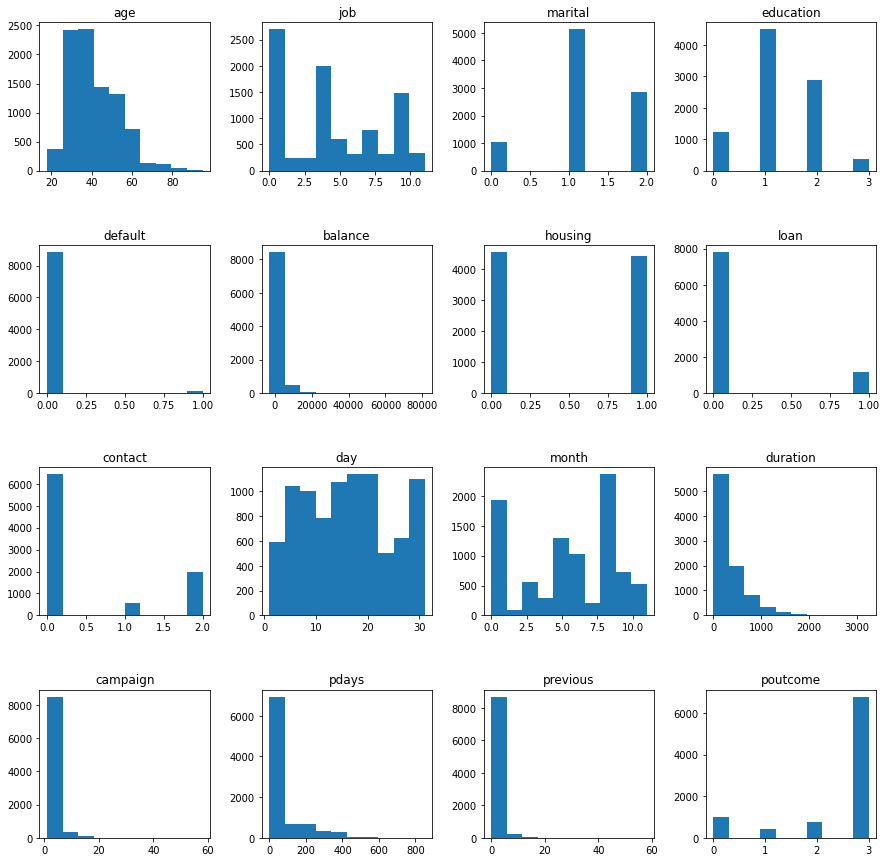

In [39]:
v = 0
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
for i in range(4):
  for j in range(4):
    axs[i,j].hist(data.iloc[:,v]) # Histograma
    axs[i,j].set_title(data.columns[v])
    v+=1                                         # Al final se suma un 1 para el siguiente loop
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

En consecuencia, se transforma las variables numéricas age, balance, duration, campaign, pdays, previous por tener sesgo negativo. Además de la transformación en logaritmo se puede emplear la función del seno hiperbólico inverso.

In [41]:
var = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

df = data.copy()
for x in var:
    df[x] = np.arcsinh(df[x])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,4.127394,6,1,2,0,8.581482,0,0,0,10,9,6.455201,1.443635,5.267885,2.491780,2,1
1,4.060740,10,2,3,0,8.060856,0,0,0,6,11,6.194410,0.881374,-0.881374,0.000000,3,1
2,4.406868,1,1,1,0,8.367300,1,0,0,17,9,6.603946,0.881374,-0.881374,0.000000,3,0
3,4.605270,1,1,1,0,5.123999,1,0,0,17,5,3.584290,2.776472,-0.881374,0.000000,3,0
4,4.382183,0,1,1,0,0.000000,0,0,0,28,5,6.899724,1.443635,5.897161,3.093102,2,1


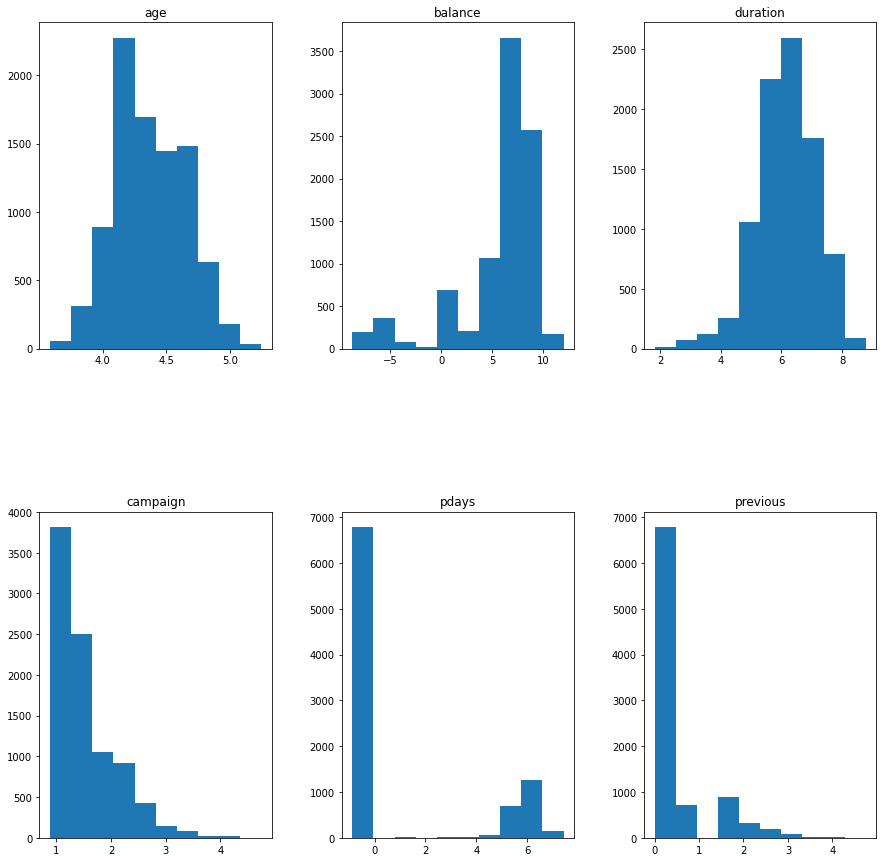

In [42]:
v = 0
fig, axs = plt.subplots(2, 3, figsize=(15, 15))
for i in range(2):
  for j in range(3):
    axs[i,j].hist(df.loc[:,var[v]]) # Histograma
    axs[i,j].set_title(var[v])
    v+=1                                         # Al final se suma un 1 para el siguiente loop
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [46]:
X = df[data.columns[:-1].to_list()]

Y = df[['y']]

In [49]:
print('Porcentaje que adquirieron el plan de inversión: ', 100 * sum(Y['y']) / Y.shape[0] )

print('Porcentaje de no adquirieron el plan de inversión: ', 100 * (1 - sum(Y['y']) / Y.shape[0]))

Porcentaje que adquirieron el plan de inversión:  42.077777777777776
Porcentaje de no adquirieron el plan de inversión:  57.92222222222223


In [52]:
from sklearn.model_selection import train_test_split

x_train, x_validation_test, y_train, y_validation_test = \
    train_test_split(X, Y, train_size=.60, random_state=11)

x_validation, x_test, y_validation, y_test = \
    train_test_split(x_validation_test, y_validation_test, train_size=.50, 
                     random_state=11)

In [53]:
print("Dimensión X_train_set:\t\t", x_train.shape)
print("Dimensión X_validation_set:\t", x_validation.shape)
print("Dimension X_test_set:\t\t", x_test.shape)

print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_validation:\t\t", y_validation.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 16)
Dimensión X_validation_set:	 (1800, 16)
Dimension X_test_set:		 (1800, 16)

Dimensión Y_train:		 (5400, 1)
Dimensión Y_validation:		 (1800, 1)
Dimensión Y_test:		 (1800, 1)


## Modelo de regresión lógistica

In [56]:
from sklearn.linear_model import LogisticRegression

Se realiza el primer modelo.

In [67]:
modelo_RL_b = LogisticRegression( C=0.1, 
                                   penalty='l2', 
                                   solver='lbfgs', 
                                   max_iter=1000, 
                                   random_state=17)

modelo_RL_b.fit( x_train, np.ravel(y_train) )

print('Accuracy: %0.4f\n' % modelo_RL_b.score(x_test, y_test))

Accuracy: 0.7750



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


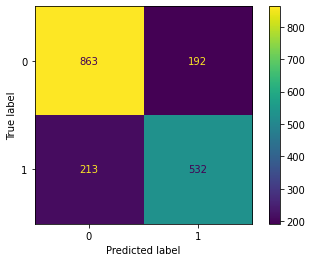

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo_RL_b, x_test, y_test, labels=[0,1])

Se cambia el parametro C, sin embargo, esto disminuye la precisión.

In [70]:
modelo_RL_b2 = LogisticRegression( C=0.2, 
                                   penalty='l2', 
                                   solver='lbfgs', 
                                   max_iter=1000, 
                                   random_state=17)

modelo_RL_b2.fit( x_train, np.ravel(y_train) )

print('Accuracy: %0.4f\n' % modelo_RL_b2.score(x_test, y_test))

Accuracy: 0.7722



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


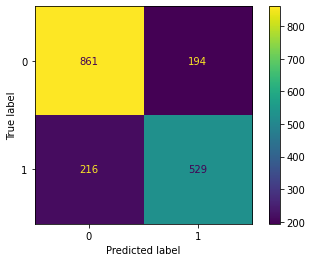

In [71]:
plot_confusion_matrix(modelo_RL_b2, x_test, y_test, labels=[0,1])

En consecuencia, se realiza el proces de busqueda de los mejores hiperparámetros con valores de C menor o igual a 0.1.

In [65]:
parameters = {'C':[0.01, 0.03, 0.05, 0.08, 0.1, 0.12, 0.18, 0.20], 
              'penalty':('l2','elasticnet', 'none'), 
              'solver':('newton-cg','saga','lbfgs','sag')}

In [66]:
from sklearn.model_selection import GridSearchCV

RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(x_train, np.ravel(y_train))

print(modelo_RL_grid)

print("Los mejores valores encontrados son %s con un score de %0.2f"
      % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))

print(modelo_RL_grid.score(x_test, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.03, 0.05, 0.08, 0.1, 0.12, 0.18, 0.2],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'} con un score de 0.81
0.7716666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver

Comprobando el modelo se tiene:

In [105]:
modelo_RL_g = LogisticRegression( C=0.01, 
                                   penalty='none', 
                                   solver='newton-cg', 
                                   max_iter=10000)

modelo_RL_g.fit( x_train, np.ravel(y_train) )

print(modelo_RL_g.score(x_test, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


0.7716666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


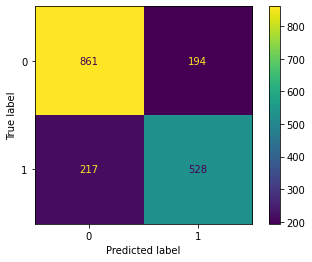

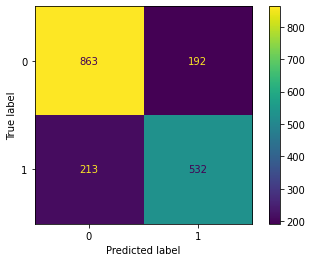

In [107]:
plot_confusion_matrix(modelo_RL_g, x_test, y_test, labels=[0,1])
plot_confusion_matrix(modelo_RL_b, x_test, y_test, labels=[0,1])

Por tanto, se considera mejor el modelo base al tener mejor precisión y un menor número de falsos negativos. Finalmente, se compara respecto a este último:

In [108]:
modelo_RL_c = LogisticRegression( C=0.01, 
                                   penalty='l2', 
                                   solver='newton-cg', 
                                   max_iter=10000)

modelo_RL_c.fit( x_train, np.ravel(y_train) )

print(modelo_RL_c.score(x_test, y_test))

0.7766666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


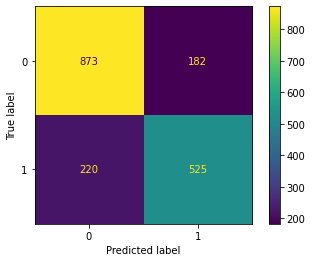

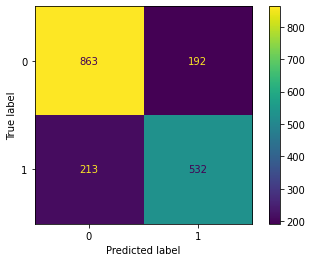

In [109]:
plot_confusion_matrix(modelo_RL_c, x_test, y_test, labels=[0,1])
plot_confusion_matrix(modelo_RL_b, x_test, y_test, labels=[0,1])

Así, se concluye que este último modelo (modelo_RL_c) es el mejor resultado, dado que tiene mejor precisión y un menor número de falsos positivos. En este sentido, los falsos positivos son importantes porque podrían generar que aumente el número de personas que acceden a este beneficio cuando no debían tenerlo.

## Modelo de Red Neuronal

In [123]:
X_train = x_train.copy()
X_test = x_test.copy()
X_validation = x_validation.copy()

# Neuronas de 5 en 5
neuronas = [i for i in range(1, 50, 5)]

from sklearn.neural_network import MLPClassifier
import numpy as np

train_scores, test_scores = list(), list()

train_errors, test_errors = list(), list()

for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes=(i,i), 
                        max_iter=3000, 
                        alpha=0.15, 
                        random_state=42)

  model.fit(X_train, y_train)


  # Predicciones y métricas con el conjunto de entrenamiento:
  train_yhat = model.predict(X_train)

  train_loss =  np.mean(abs(np.ravel(y_train) - train_yhat))   
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)

  

  # Predicciones y métricas con el conjunto de prueba:
  test_yhat = model.predict(X_test)
  
  test_loss = np.mean(abs(np.ravel(y_test) - test_yhat))
  test_errors.append(test_loss)

  test_acc = 1 - test_loss
  test_scores.append(test_acc)



  # evolución de las métricas durante el entrenamiento ...
  print('> %d...\t trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f' 
        % (i, train_acc, test_acc, train_loss, test_loss))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 1...	 trainacc: 0.756, testacc: 0.732, trainloss: 0.244, testloss: 0.268


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 6...	 trainacc: 0.813, testacc: 0.784, trainloss: 0.187, testloss: 0.216


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 11...	 trainacc: 0.823, testacc: 0.791, trainloss: 0.177, testloss: 0.209


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 16...	 trainacc: 0.831, testacc: 0.795, trainloss: 0.169, testloss: 0.205


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 21...	 trainacc: 0.835, testacc: 0.789, trainloss: 0.165, testloss: 0.211


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 26...	 trainacc: 0.841, testacc: 0.791, trainloss: 0.159, testloss: 0.209


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 31...	 trainacc: 0.851, testacc: 0.792, trainloss: 0.149, testloss: 0.208


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 36...	 trainacc: 0.840, testacc: 0.783, trainloss: 0.160, testloss: 0.217


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 41...	 trainacc: 0.839, testacc: 0.790, trainloss: 0.161, testloss: 0.210


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> 46...	 trainacc: 0.851, testacc: 0.786, trainloss: 0.149, testloss: 0.214


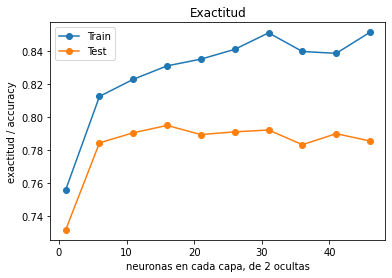

In [124]:
import matplotlib.pyplot as plt 

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud')
plt.xlabel('neuronas en cada capa, de 2 ocultas')
plt.ylabel('exactitud / accuracy')
plt.show()

De este análisis se desprende que los puntos de interés por analizar mediante la matriz de confusión son cuando se emplean 11,16 y 31 neuronas.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7905555555555556


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.795


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7922222222222223


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


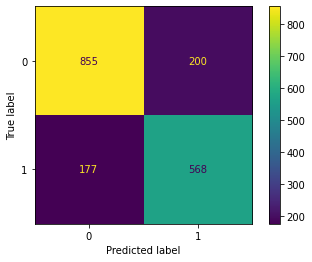

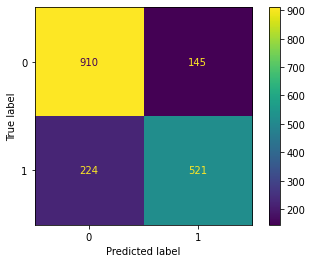

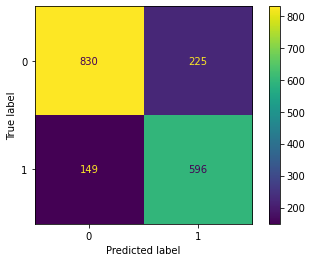

In [122]:
neus = [11,16,31]

for i in neus:

  model = MLPClassifier(hidden_layer_sizes=(i,i), 
                        max_iter=3000, 
                        alpha=0.15, 
                        random_state=42)

  model.fit(X_train, y_train)
  print(model.score(X_test, y_test))
  plot_confusion_matrix(model, X_test, y_test, labels=[0,1])

En consecuencia, el modelos de 16 neuronas en cada una de los 2 capas ocultas es el mejor modelo de los encontrados en los ejercicios anteriores. La razón es que tiene el mayor nivel de precisión y un menor número de falsos positivos. 

Por un erro en el codigo, se etiquetó al conjunto de entrenamiento con test y al conjunto de prueba con validation. Como ambos conjuntos son del mismo tamaño y en ningun momento se utilizo el conjunto de prueba llamado validation, se realiza la prueba final del modelo:

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8088888888888889


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


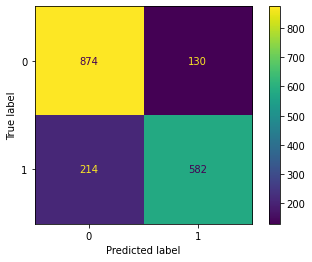

In [125]:
model = MLPClassifier(hidden_layer_sizes=(16,16), 
                        max_iter=3000, 
                        alpha=0.15, 
                        random_state=42)

model.fit(X_train, y_train)
print(model.score(X_validation, y_validation))
plot_confusion_matrix(model, X_validation, y_validation, labels=[0,1])

En conclusión, el mejor modelo es uno de redes neuronales con 16 neuronas en cada una de las 2 capas ocultas y tiene una precisión del 80.8% en el conjunto de prueba, lo cual lo convierte en un buen modelo de predicción para la toma de decisiones. Asimismo, tiene la característica de tener un menor número de falsos positivos, siendo esto un factor importante, pues, no es deseable que se asignen beneficios a las personas que no deberían tenerlos.